In [321]:
import math
import matplotlib.pyplot as plt
import numpy as np
import sys, getopt
import subprocess
import csv
import os
from tabulate import tabulate

def read_latencies(scheduler_count, exec_type):
    times = []
    durations = []
    for id in range(0, scheduler_count):
        with open(os.getcwd() + '/results/latencies_' + str(id) + '_' + exec_type + '.csv') as csvfile:
            reader = csv.reader(csvfile, delimiter=',')
            for row in reader:
                for item in row:
                    # Split each item by space
                    parts = item.split()
                    if len(parts) == 2:
                        # Extract time and duration from each part
                        time_str, duration_str = parts
                        times.append(time_str)
                        durations.append(int(duration_str))

    aggregated_durations = {}
    for time, duration in zip(times, durations):
        second = int(int(time) / 1000)  # Convert milliseconds to seconds
        if second in aggregated_durations:
            aggregated_durations[second] += duration
        else:
            aggregated_durations[second] = duration
    sorted_seconds = sorted(aggregated_durations.keys())
    cumulative_durations = [aggregated_durations[sorted_seconds[0]]]  # Initialize cumulative durations
    for second in sorted_seconds[1:]:
        cumulative_durations.append(cumulative_durations[-1] + aggregated_durations[second])
    cumulative_durations_sec = []
    for cumulative_duration in cumulative_durations:
        cumulative_durations_sec.append(cumulative_duration / 1000)  # Convert milliseconds to seconds
        
    return sorted_seconds, cumulative_durations_sec

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import sys, getopt
import subprocess
import csv
import os
from tabulate import tabulate

def read_latencies_millis(scheduler_count, exec_type):
    times = []
    durations = []
    for id in range(0, scheduler_count):
        with open(os.getcwd() + '/results/latencies_' + str(id) + '_' + exec_type + '.csv') as csvfile:
            reader = csv.reader(csvfile, delimiter=',')
            for row in reader:
                for item in row:
                    # Split each item by space
                    parts = item.split()
                    if len(parts) == 2:
                        # Extract time and duration from each part
                        time_str, duration_str = parts
                        times.append(time_str)
                        durations.append(int(duration_str))

    aggregated_durations = {}
    for time, duration in zip(times, durations):
        millisecond = int(int(time)) 
        if millisecond in aggregated_durations:
            aggregated_durations[millisecond] += duration
        else:
            aggregated_durations[millisecond] = duration
    sorted_milliseconds = sorted(aggregated_durations.keys())
    cumulative_durations = [aggregated_durations[sorted_milliseconds[0]]]  # Initialize cumulative durations
    for millisecond in sorted_milliseconds[1:]:
        cumulative_durations.append(cumulative_durations[-1] + aggregated_durations[millisecond])
        
    return sorted_milliseconds, cumulative_durations

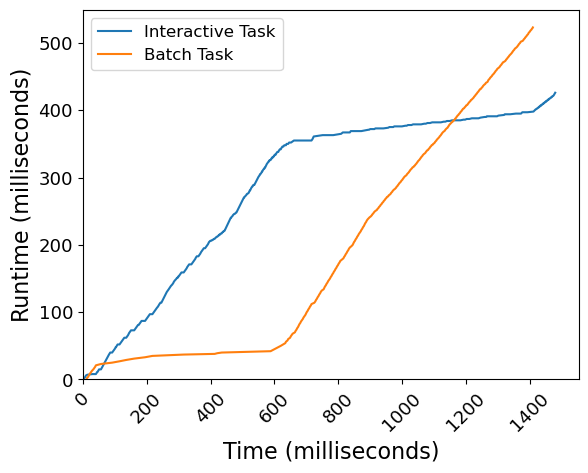

In [740]:
cpu_times, cpu_durations = read_latencies_millis(1, 'multi-cpu')
io_times, io_durations = read_latencies_millis(1, 'multi-io')

plt.rcParams.update({'font.size': 13})
plt.plot(io_times, io_durations, label='Interactive Task')
plt.plot(cpu_times, cpu_durations, label='Batch Task')
plt.xlabel('Time (milliseconds)', fontsize=16)
plt.ylabel('Runtime (milliseconds)', fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.savefig('images/multi_io_cpu.png', bbox_inches='tight')

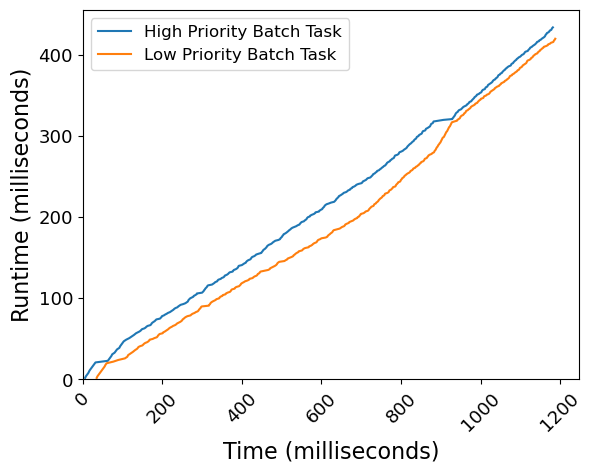

In [739]:
cpu_times, cpu_durations = read_latencies_millis(1, 'multi-cpu-low')
io_times, io_durations = read_latencies_millis(1, 'multi-cpu-high')

plt.rcParams.update({'font.size': 13})
plt.plot(io_times, io_durations, label='High Priority Batch Task')
plt.plot(cpu_times, cpu_durations, label='Low Priority Batch Task')
plt.xlabel('Time (milliseconds)', fontsize=16)
plt.ylabel('Runtime (milliseconds)', fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.savefig('images/multi_cpu_cpu.png', bbox_inches='tight')

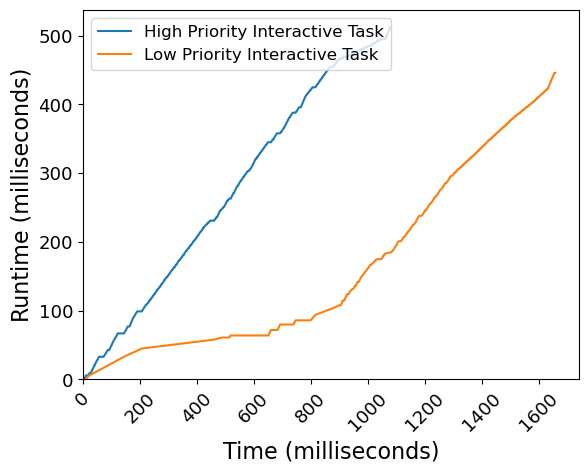

In [738]:
cpu_times, cpu_durations = read_latencies_millis(1, 'multi-io-low')
io_times, io_durations = read_latencies_millis(1, 'multi-io-high')

plt.rcParams.update({'font.size': 13})
plt.plot(io_times, io_durations, label='High Priority Interactive Task')
plt.plot(cpu_times, cpu_durations, label='Low Priority Interactive Task')
plt.xlabel('Time (milliseconds)', fontsize=16)
plt.ylabel('Runtime (milliseconds)', fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xticks(rotation=45) 
plt.savefig('images/multi_io_io.png', bbox_inches='tight')

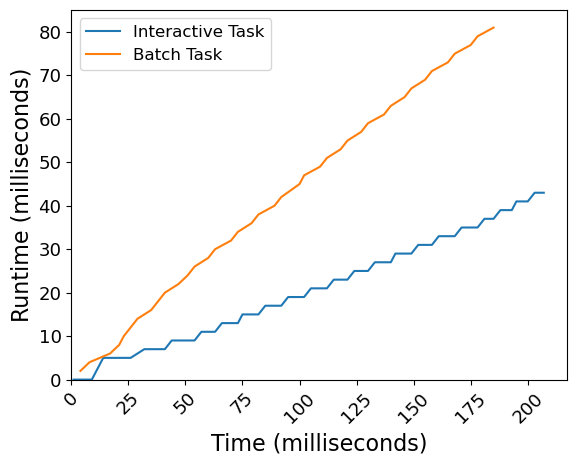

In [734]:
cpu_times, cpu_durations = read_latencies_millis(1, 'cpu')
io_times, io_durations = read_latencies_millis(1, 'io')

plt.rcParams.update({'font.size': 13})
plt.plot(io_times, io_durations, label='Interactive Task')
plt.plot(cpu_times, cpu_durations, label='Batch Task')
plt.xlabel('Time (milliseconds)', fontsize=16)
plt.ylabel('Runtime (milliseconds)', fontsize=16)
plt.legend(fontsize=12)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.savefig('images/single_io_cpu.png', bbox_inches='tight')
# One CPU task chain is co-scheduler with another IO task chain. 
# The step graph for IO task indicate the time it spend in doing IO.
# CPU task progress when the IO task is waiting for IO.
# Since there is no preemption, when IO task is done it has to wait for CPU task to yield

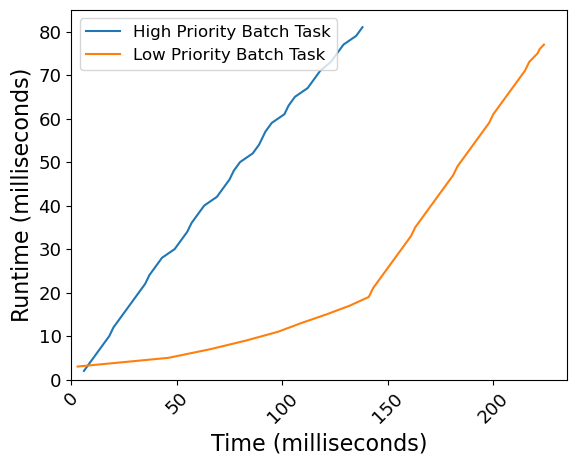

In [730]:
cpu_times, cpu_durations = read_latencies_millis(1, 'cpu-low')
io_times, io_durations = read_latencies_millis(1, 'cpu-high')

plt.rcParams.update({'font.size': 13})
plt.plot(io_times, io_durations, label='High Priority Batch Task')
plt.plot(cpu_times, cpu_durations, label='Low Priority Batch Task')
plt.xlabel('Time (milliseconds)', fontsize=16)
plt.ylabel('Runtime (milliseconds)', fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.savefig('images/single_cpu_cpu.png', bbox_inches='tight')

# One CPU task chain is co-scheduler with another CPU task chain. 
# High priority one gets executed first, but as both are batch tasks and as batch tasks use calender queue 
# low priority ones will not starve but gets scheduled to be executed little later

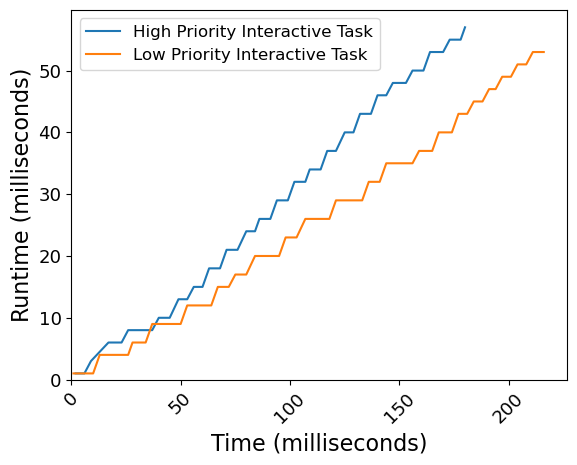

In [732]:
cpu_times, cpu_durations = read_latencies_millis(1, 'io-low')
io_times, io_durations = read_latencies_millis(1, 'io-high')

plt.rcParams.update({'font.size': 13})
plt.plot(io_times, io_durations, label='High Priority Interactive Task')
plt.plot(cpu_times, cpu_durations, label='Low Priority Interactive Task')
plt.xlabel('Time (milliseconds)', fontsize=16)
plt.ylabel('Runtime (milliseconds)', fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.savefig('images/single_io_io.png', bbox_inches='tight')

# One IO task chain is co-scheduler with another IO task chain. 
# High priority one gets executed first, but as both are interactive tasks tasks
# Low priority ones will get executed when all the high priority IO tasks are waiting for IO.

In [618]:
import math
import matplotlib.pyplot as plt
import numpy as np
import sys, getopt
import subprocess
import csv
import os
import seaborn as sns
from tabulate import tabulate
import pandas as pd

def read_task_queue_sizes(scheduler_count):
    times_milliseconds = {}
    task_queue_sizes = {}
    for id in range(0, scheduler_count):
        task_queue_sizes[id] = []
        times_milliseconds[id] = []
        with open(os.getcwd() + '/results/queue_sizes_' + str(id) + '.csv') as csvfile:
            reader = csv.reader(csvfile, delimiter=',')
            for row in reader:
                for item in row:
                    # Split each item by space
                    parts = item.split()
                    if len(parts) == 2:
                        # Extract time and task_queue_size from each part
                        time_str, task_queue_size_str = parts
                        times_milliseconds[id].append(int(int(time_str)/1000))
                        task_queue_sizes[id].append(int(task_queue_size_str))

    return times_milliseconds, task_queue_sizes

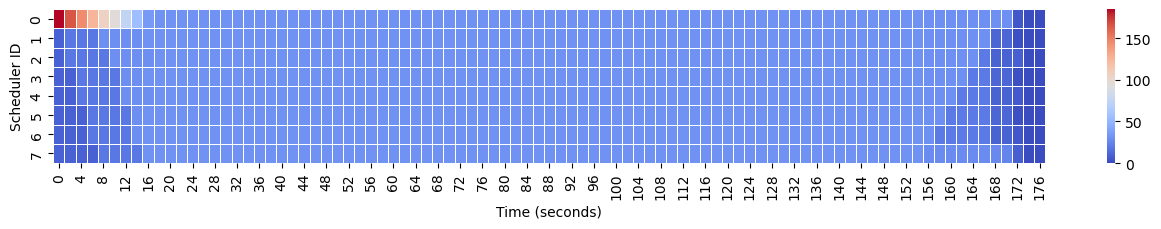

In [657]:
scheduler_count = 8
times_dict, taskqueue_dict = read_task_queue_sizes(scheduler_count)

interval = 2
time_index = range(0, max(max(times) for times in times_dict.values()) + interval, interval)
df = pd.DataFrame(index=time_index)

# Add scheduler ID columns
for scheduler_id in times_dict.keys():
    df[scheduler_id] = None

# Fill DataFrame with values from dictionaries
for scheduler_id, times in times_dict.items():
    last_value = None
    for time, taskqueue_size in zip(times, taskqueue_dict[scheduler_id]):
        bucket = time // interval * interval  # Round time to nearest 100 millis
        df.loc[bucket, scheduler_id] = taskqueue_size
        last_value = taskqueue_size

    # If there are no values for a scheduler in a 100 millis bucket,
    # pick the value from the previous bucket
    for time in time_index:
        if df.loc[time, scheduler_id] is None:
            if time == 0:
                df.loc[time, scheduler_id] = 0
            else:
                df.loc[time, scheduler_id] = df.loc[time-interval, scheduler_id]
df = df.astype(float)

plt.figure(figsize=(16, 2))
sns.heatmap(df.T, cmap='coolwarm', fmt='g', linewidths=0.5)  # Transpose DataFrame to have scheduler IDs on y-axis
plt.xlabel('Time (seconds)')
plt.ylabel('Scheduler ID')
plt.savefig('images/load_balancing_8_cores.png', bbox_inches='tight')

In [545]:
import math
import matplotlib.pyplot as plt
import numpy as np
import sys, getopt
import subprocess
import csv
import os
from tabulate import tabulate

def read_penalities(scheduler_count, group_count, exec_type):
    times_milliseconds = {}
    penalities = {}
    for group_no in range(0, group_count):
        penalities[group_no] = []
        times_milliseconds[group_no] = []
        for id in range(0, scheduler_count):
            try:
                with open(os.getcwd() + '/results/penalities_' + str(id) + '_' + exec_type + '-' + str(group_no) + '.csv') as csvfile:
                    reader = csv.reader(csvfile, delimiter=',')
                    for row in reader:
                        for item in row:
                            # Split each item by space
                            parts = item.split()
                            if len(parts) == 2:
                                # Extract time and penality from each part
                                time_str, penality_str = parts
                                times_milliseconds[group_no].append(int(time_str))
                                penalities[group_no].append(int(penality_str))
            except Exception as e:
#                 print("Error processing scheduler: ", id, ", group: ", group_no)
                continue
    
        sorted_penalities_dict = {}
        for time, penality in zip(times_milliseconds[group_no], penalities[group_no]):
            second = int(int(time))  # Convert milliseconds to seconds
            if second in sorted_penalities_dict:
                sorted_penalities_dict[second] = max(sorted_penalities_dict[second], penality)
            else:
                sorted_penalities_dict[second] = penality
        sorted_seconds = sorted(sorted_penalities_dict.keys())
        sorted_penalities = []
        for second in sorted_seconds:
            sorted_penalities.append(sorted_penalities_dict[second])
        penalities[group_no] = sorted_penalities
        times_milliseconds[group_no] = sorted_seconds

    return times_milliseconds, penalities

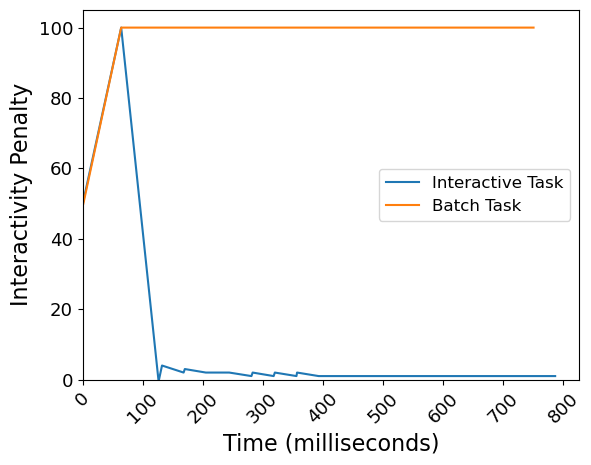

In [741]:
group_count = 1
plt.rcParams.update({'font.size': 13})

times_milliseconds_io, penalities_io = read_penalities(1, group_count, 'interactivity-sch-io')
for group_no in range(0, group_count):
    plt.plot(times_milliseconds_io[group_no], penalities_io[group_no], label='Interactive Task')
times_milliseconds_cpu, penalities_cpu = read_penalities(1, group_count, 'interactivity-sch-cpu')
for group_no in range(0, group_count):
    plt.plot(times_milliseconds_cpu[group_no], penalities_cpu[group_no], label='Batch Task')    

plt.xlabel('Time (milliseconds)', fontsize=16)
plt.ylabel('Interactivity Penalty', fontsize=16)
plt.legend(loc='center right', fontsize=12)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.savefig('images/interactivity_penalty.png', bbox_inches='tight')

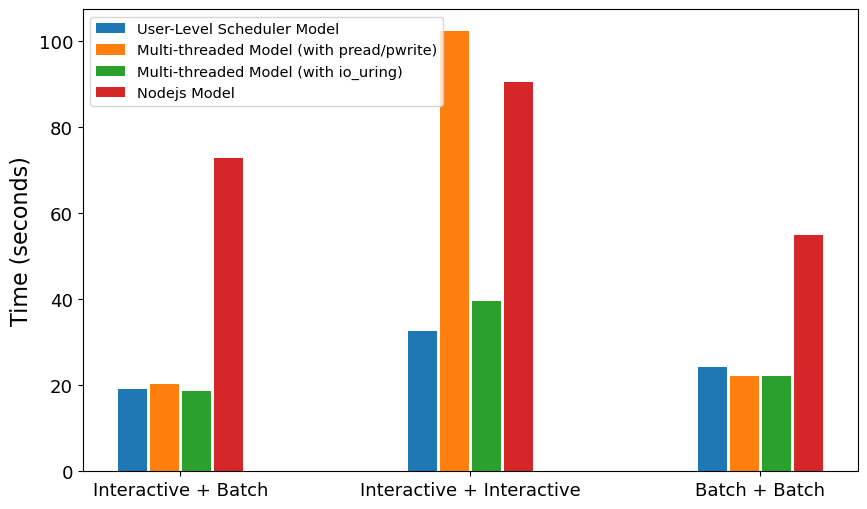

In [758]:
import matplotlib.pyplot as plt

data = {
    'User-Level Scheduler Model': {
        'Interactive + Batch': 19054,
        'Interactive + Interactive': 32593,
        'Batch + Batch': 24231
    },
    'Multi-threaded Model (with pread/pwrite)': {
        'Interactive + Batch': 20241,
        'Interactive + Interactive': 102371,
        'Batch + Batch': 22069
    },
    'Multi-threaded Model (with io_uring)': {
        'Interactive + Batch': 18566,
        'Interactive + Interactive': 39584,
        'Batch + Batch': 22069
    },
    'Nodejs Model': {
        'Interactive + Batch': 72788,
        'Interactive + Interactive': 90561,
        'Batch + Batch': 54965
    }
}

# Convert milliseconds to seconds with decimals
for section, values in data.items():
    for model, time_ms in values.items():
        data[section][model] = time_ms / 1000  # Convert milliseconds to seconds

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
plt.rcParams.update({'font.size': 13})

bar_width = 0.1  # Set the width of each bar
gap_between_sections = 0.01  # Set the gap between each section

index = range(len(data['User-Level Scheduler Model']))

for i, (section, values) in enumerate(data.items()):
    bars = ax.bar([j + (i - 1) * (bar_width + gap_between_sections) for j in index], values.values(), width=bar_width, label=section)
    for bar in bars:
        height = bar.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(bar.get_x() + bar.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')

# Add titles and labels
ax.set_ylabel('Time (seconds)', fontsize=16)
ax.set_xticks([i + (bar_width + gap_between_sections)/2 for i in index])
ax.set_xticklabels(data['User-Level Scheduler Model'].keys())
ax.legend(loc='upper left', fontsize=10.5)
plt.savefig('images/multi_threaded_performance.png', bbox_inches='tight')

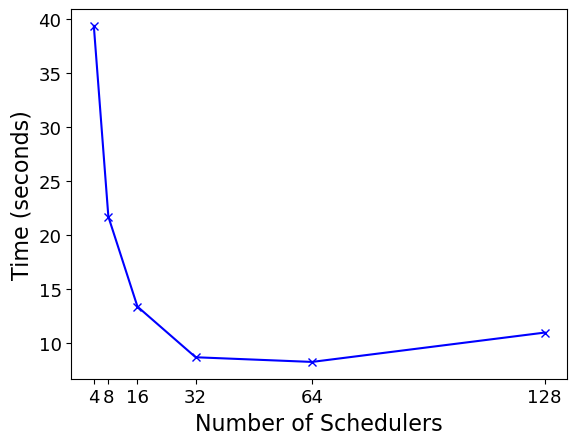

In [750]:
import matplotlib.pyplot as plt

data = {
    4: 39325,
    8: 21666,
    16: 13340,
    32: 8652,
    64: 8220,
    128: 10937
}

# Convert time to seconds
for schedulers, time_ms in data.items():
    data[schedulers] = time_ms / 1000  # Convert milliseconds to seconds

# Extract x and y values
x_values = list(data.keys())
y_values = list(data.values())

plt.rcParams.update({'font.size': 13})

# Plot the data points
plt.plot(x_values, y_values, marker='x', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Number of Schedulers', fontsize=16)
plt.ylabel('Time (seconds)', fontsize=16)

# Customize x-axis ticks and labels
plt.xticks(x_values, labels=[str(schedulers) for schedulers in x_values])

# Show the plot
plt.savefig('images/multi_cores.png', bbox_inches='tight')

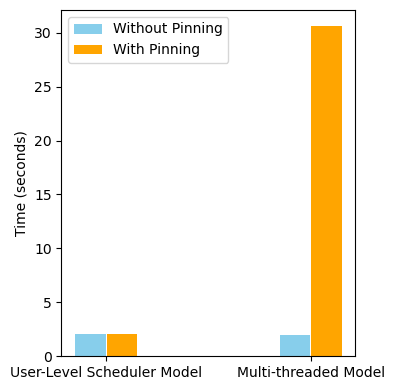

In [661]:
import matplotlib.pyplot as plt

data = {
    'User-Level Scheduler Model': {
        'WithoutPinning': 2094,
        'WithPinning': 2108
    },
    'Multi-threaded Model': {
        'WithoutPinning': 1930,
        'WithPinning': 30570
    }
}

models = list(data.keys())
pinning_statuses = list(data[models[0]].keys())

without_pinning_times = [data[model]['WithoutPinning'] / 1000 for model in models]  # Convert milliseconds to seconds
with_pinning_times = [data[model]['WithPinning'] / 1000 for model in models]  # Convert milliseconds to seconds

bar_width = 0.15
gap = 0.005  # small gap between bars
index = range(len(models))

plt.figure(figsize=(4, 4))
plt.bar(index, without_pinning_times, bar_width, label='Without Pinning', color='skyblue')  # Blue color for without pinning
plt.bar([i + bar_width + gap for i in index], with_pinning_times, bar_width, label='With Pinning', color='orange')  # Orange color for with pinning

# Calculate percentage increase
percentage_increase = [(with_pinning - without_pinning) / without_pinning * 100 
                        for with_pinning, without_pinning in zip(with_pinning_times, without_pinning_times)]

plt.ylabel('Time (seconds)')
# plt.title('Execution Time Comparison with and without Pinning')
plt.xticks([i + bar_width / 2 + gap / 2 for i in index], models)  # Adjust x-ticks position
plt.legend()

plt.tight_layout()
plt.savefig('images/multi_threaded_load_balancing.png', bbox_inches='tight')

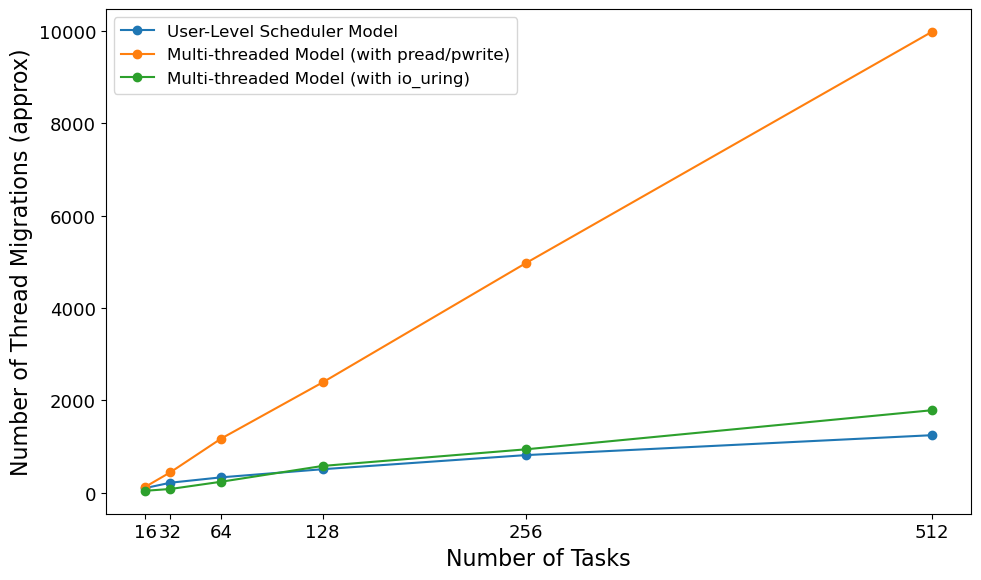

In [756]:
import matplotlib.pyplot as plt


data = {
    'User-Level Scheduler Model': {
        16: 103,
        32: 220,
        64: 336,
        128: 512,
        256: 817,
        512: 1248
    },
    'Multi-threaded Model (with pread/pwrite)': {
        16: 128,
        32: 447,
        64: 1176,
        128: 2392,
        256: 4971,
        512: 9977
    },
    'Multi-threaded Model (with io_uring)': {
        16: 45,
        32: 84,
        64: 241,
        128: 583,
        256: 942,
        512: 1788
    }
}

# Extract x and y values for each model
x_values = list(data['User-Level Scheduler Model'].keys())
y_values_uls = list(data['User-Level Scheduler Model'].values())
y_values_mt_pread_pwrite = list(data['Multi-threaded Model (with pread/pwrite)'].values())
y_values_mt_io_uring = list(data['Multi-threaded Model (with io_uring)'].values())

# Plot the data
plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values_uls, marker='o', label='User-Level Scheduler Model')
plt.plot(x_values, y_values_mt_pread_pwrite, marker='o', label='Multi-threaded Model (with pread/pwrite)')
plt.plot(x_values, y_values_mt_io_uring, marker='o', label='Multi-threaded Model (with io_uring)')
# plt.title('Number of Thread Migrations vs. Number of Tasks')
plt.xlabel('Number of Tasks', fontsize=16)
plt.ylabel('Number of Thread Migrations (approx)', fontsize=16)
plt.legend(fontsize=12)
plt.xticks(x_values)
plt.grid(False)
plt.tight_layout()
plt.savefig('images/multi_threaded_thread_migrations.png', bbox_inches='tight')
